## Airbnb RJ Short - Análise de exploração de dados

A seguinte análise de dados é da plataforma de alugueis Airbnb considerado como sendo a maior empresa hoteleira da atualidade. A empresa conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática fornecendo uma plataforma inovadora para tornar essa hospedagem alternativa. A seguinte análise exploratória busca responder algumas perguntas quantos aos imoveis disponiveis para aluguel na cidade do Rio de Janeiro:

*   Qual a correlação existente entre as variáveis?
*   Qual o tipo de imóvel mais alugado no Airbnb?
*   Qual a localidade mais cara do Rio?

Os dados no dataset disponível no site da plataforma estão estruturados da seguitinte maneira:



<p>id - número de id gerado para identificar o imóvel
<p>name - nome da propriedade anunciada
<p>host_id - número de id do proprietário (anfitrião) da propriedade
<p>host_name - Nome do anfitrião
<p>neighbourhood_group - esta coluna não contém nenhum valor válido
<p>neighbourhood - nome do bairro
<p>latitude - coordenada da latitude da propriedade
<p>longitude - coordenada da longitude da propriedade
<p>room_type - informa o tipo de quarto que é oferecido
<p>price - preço para alugar o imóvel
<p>minimum_nights - quantidade mínima de noites para reservar
<p>number_of_reviews - número de reviews que a propriedade possui
<p>last_review - data do último review
<p>reviews_per_month - quantidade de reviews por mês
<p>calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
<p>availability_365 - número de dias de disponibilidade dentro de 365 dias


Perguntas a serem respondidas no dataset

<h1> Análise dos dados

In [69]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [373]:
df = pd.read_csv('listings (1).csv',error_bad_lines=False, engine="python")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24881 non-null  int64  
 1   listing_url                                   24881 non-null  object 
 2   scrape_id                                     24881 non-null  int64  
 3   last_scraped                                  24881 non-null  object 
 4   name                                          24860 non-null  object 
 5   description                                   23975 non-null  object 
 6   neighborhood_overview                         13370 non-null  object 
 7   picture_url                                   24881 non-null  object 
 8   host_id                                       24881 non-null  int64  
 9   host_url                                      24881 non-null 

In [134]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [254]:
df['price']

0        $150.00
1        $450.00
2        $350.00
3        $145.00
4        $180.00
          ...   
24876    $330.00
24877    $188.00
24878     $89.00
24879    $536.00
24880    $170.00
Name: price, Length: 24881, dtype: object

In [376]:
df['price'] = df.price.str.replace("$", "")
df['price'] = pd.to_numeric(df['price'] ,errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [256]:
pd.options.display.float_format = '{:.2f}'.format

In [257]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24881.00,70273060205427664.00,192419365743057696.00,17878.00,13714235.00,34495732.00,51149421.00,652906288194802176.00
scrape_id,24881.00,20220620202144.00,0.00,20220620202144.00,20220620202144.00,20220620202144.00,20220620202144.00,20220620202144.00
host_id,24881.00,122480508.30,133110829.88,3607.00,15371748.00,68157574.00,197956877.00,464894609.00
host_listings_count,24764.00,8.77,32.45,0.00,1.00,1.00,4.00,518.00
host_total_listings_count,24764.00,8.77,32.45,0.00,1.00,1.00,4.00,518.00
neighbourhood_group_cleansed,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,24881.00,-22.97,0.04,-23.07,-22.98,-22.97,-22.95,-22.75
longitude,24881.00,-43.25,0.10,-43.77,-43.30,-43.20,-43.19,-43.10
accommodates,24881.00,4.15,2.45,0.00,2.00,4.00,5.00,16.00
bathrooms,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valores faltantes nas colunas do dataset

In [258]:
( df.isnull().sum() / df.shape[0]*100).sort_values(ascending = False)

neighbourhood_group_cleansed   100.00
license                        100.00
bathrooms                      100.00
calendar_updated               100.00
host_neighbourhood              52.34
                                ...  
maximum_maximum_nights           0.00
minimum_nights_avg_ntm           0.00
maximum_nights_avg_ntm           0.00
availability_30                  0.00
id                               0.00
Length: 74, dtype: float64

Nota-se que a coluna lneighbourhood_group_cleansed, license,                    bathrooms e calendar_updated possuem dos valores faltantes.

In [259]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15965441,https://www.airbnb.com/rooms/15965441,20220620202144,2022-06-20,Quarto de casal com vista para a Baía de Guana...,"Meu espaço é bom para casais, aventuras indivi...",NaN,https://a0.muscache.com/pictures/76550464-7859...,103691209,https://www.airbnb.com/users/show/103691209,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
1,47908784,https://www.airbnb.com/rooms/47908784,20220620202144,2022-06-20,"Apartamento bem localizado, bonito e familiar!",NaN,NaN,https://a0.muscache.com/pictures/f44537ff-72f1...,83985216,https://www.airbnb.com/users/show/83985216,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,52239613,https://www.airbnb.com/rooms/52239613,20220620202144,2022-06-20,Apartamento com varanda e linda vista,"Condomínio com porteiro 24 horas , piscina, sa...",O condomínio fica em frente ao portão 2 do PRO...,https://a0.muscache.com/pictures/miso/Hosting-...,422870631,https://www.airbnb.com/users/show/422870631,...,4.78,4.78,4.89,NaN,f,1,1,0,0,1.16
3,10445855,https://www.airbnb.com/rooms/10445855,20220620202144,2022-06-20,"Campo dos Afonsos, Sulacap",Casa com vista para as instalações do Parque ...,"Bairro suburbano, tranquilo, seguro, casas bem...",https://a0.muscache.com/pictures/0f42e026-0955...,1647571,https://www.airbnb.com/users/show/1647571,...,4.87,4.70,4.57,NaN,f,1,1,0,0,0.64
4,565405043878669885,https://www.airbnb.com/rooms/565405043878669885,20220620202144,2022-06-20,Pousada completa: 2 quartos com muita natureza!,Este lugar único e cheio de estilo é o cenário...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24596747,https://www.airbnb.com/users/show/24596747,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24876,603404416331588361,https://www.airbnb.com/rooms/603404416331588361,20220620202144,2022-06-21,Um Oásis na cidade,Olá. Somos um casal brasileiro-dinamarquesa di...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4536917,https://www.airbnb.com/users/show/4536917,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
24877,54183633,https://www.airbnb.com/rooms/54183633,20220620202144,2022-06-21,Rio Stay Residence Riocentro Suíte-B,"Suíte solteiro em apart hotel 4 estrelas, tudo...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,352599409,https://www.airbnb.com/users/show/352599409,...,3.50,4.75,3.75,NaN,f,16,16,0,0,0.78
24878,23033490,https://www.airbnb.com/rooms/23033490,20220620202144,2022-06-21,Quarto Suite Privativo Leme/Copacabana RJ,Apto Frente Mar e com Magnífica Vista Panorâmi...,O Leme/Copacabana é um Bairro Tradicional e co...,https://a0.muscache.com/pictures/12c7ac12-a337...,21158091,https://www.airbnb.com/users/show/21158091,...,4.98,5.00,4.94,NaN,f,3,0,3,0,1.47
24879,2341248,https://www.airbnb.com/rooms/2341248,20220620202144,2022-06-21,Charming apartment at Botafogo,"This is charming and warm apartment, where I f...","The neighborhood is quiet and familiar, with s...",https://a0.muscache.com/pictures/31265315/741c...,9802687,https://www.airbnb.com/users/show/9802687,...,5.00,4.67,4.33,NaN,f,1,1,0,0,0.10


In [260]:
df.drop(columns = ['latitude','longitude','calendar_updated',
                   'neighbourhood_group_cleansed','bathrooms','license',
                   'id','listing_url','scrape_id',	'last_scraped','description',
                   'neighborhood_overview','picture_url','host_id','host_url','host_thumbnail_url',
                   'host_picture_url','listing_url', 'host_neighbourhood','neighbourhood_cleansed','host_about'],inplace=True)

Explorando o tipo de distribuição das variáveis através de histogramas

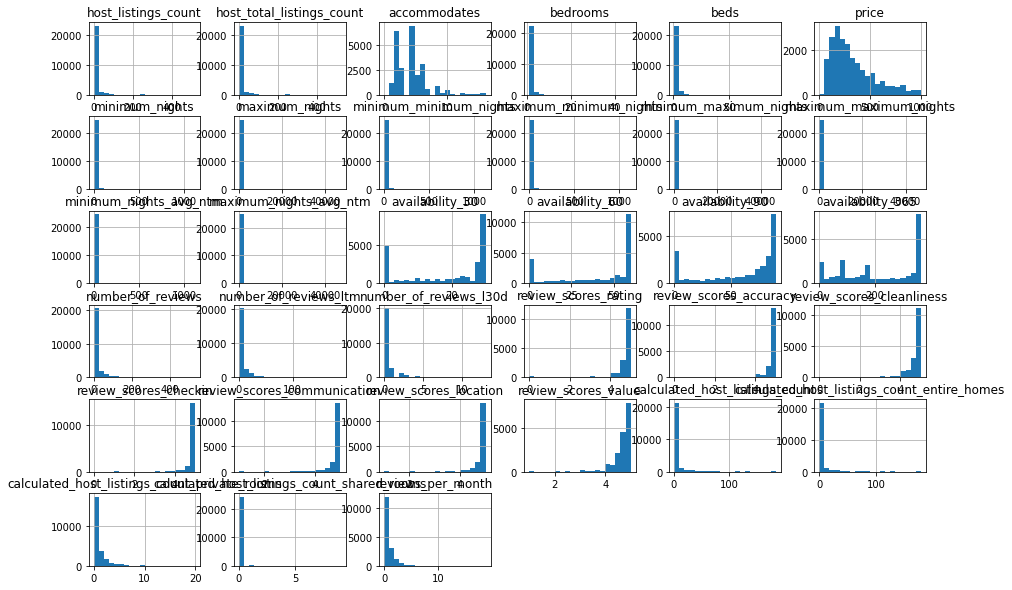

In [261]:
df.hist(bins=20, figsize=(15,10)); 

In [262]:
df_nums = df.select_dtypes(include=('int64','float64'))
df_clean = df_nums.copy()

Como visto há muitas representações de outliers, para tal é necessário que seja feita a exclusão desse valores para que não haja intereferencias nas análises finais. Alguns boxplots podem representar esses valores.

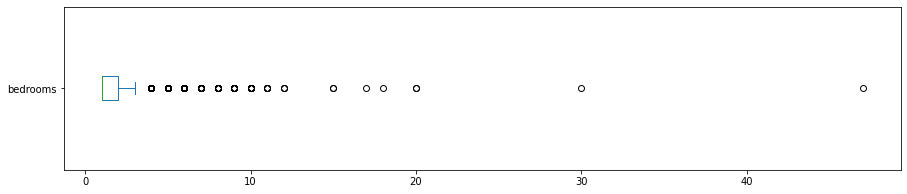

Media 1.7007 e std 1.0929
4080 entradas maiores que std
16.3981%


In [298]:
df_nums.bedrooms.plot(kind='box', vert=False, figsize=(15, 3))
std = df_nums.bedrooms.std()
mean = df_nums.bedrooms.mean()
meanstd = mean + std
plt.show()

maiorstd = len(df_nums[df_nums.bedrooms > std+mean])

print("Media {:.4f} e std {:.4f}".format(mean, std))
print("{} entradas maiores que std".format(maiorstd))
print("{:.4f}%".format((maiorstd/df_nums.shape[0])*100))

df_clean.drop(df_clean[df_clean['bedrooms'] > 3*meanstd].index, inplace= True)

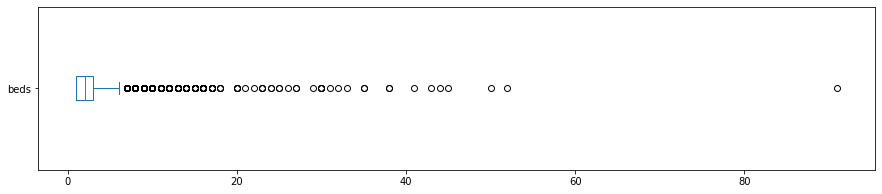

Media 2.6105 e std 2.2202
2820 entradas maiores que std
11.3339%


In [299]:
df_nums.beds.plot(kind='box', vert=False, figsize=(15, 3))
std = df_nums.beds.std()
mean = df_nums.beds.mean()
meanstd = mean + std
plt.show()

maiorstd = len(df_nums[df_nums.beds > std+mean])

print("Media {:.4f} e std {:.4f}".format(mean, std))
print("{} entradas maiores que std".format(maiorstd))
print("{:.4f}%".format((maiorstd/df_nums.shape[0])*100))

df_clean.drop(df_clean[df_clean['beds'] > meanstd].index, inplace=True)



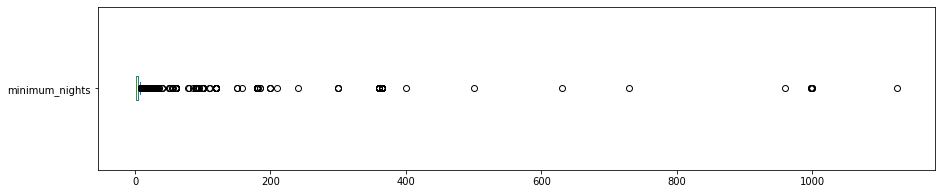

Media 5.3584 e std 26.0441
262 entradas maiores que std
1.0530%


In [300]:
df_nums.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
std = df_nums.minimum_nights.std()
mean = df_nums.minimum_nights.mean()
meanstd = std + mean
plt.show()

maiorstd = len(df_nums[df_nums.minimum_nights > std+mean])

print("Media {:.4f} e std {:.4f}".format(mean, std))
print("{} entradas maiores que std".format(maiorstd))
print("{:.4f}%".format((maiorstd/df_nums.shape[0])*100))

df_clean.drop(df_clean[df_clean['minimum_nights'] > meanstd].index, inplace=True)

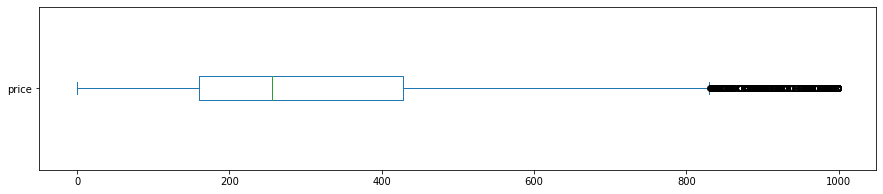

Media 321.2180 e std 210.5570
3363 entradas maiores que std
13.5163%


In [301]:
df_nums.price.plot(kind='box', vert=False, figsize=(15, 3))
std = df_nums.price.std()
mean = df_nums.price.mean()
meanstd = std + mean
plt.show()

maiorstd = len(df_nums[df_nums.price > std+mean])

print("Media {:.4f} e std {:.4f}".format(mean, std))
print("{} entradas maiores que std".format(maiorstd))
print("{:.4f}%".format((maiorstd/df_nums.shape[0])*100))

df_clean.drop(df_clean[df_clean['price'] > 3*meanstd].index, inplace=True)

Inrpretando esses valores de outliers, faz-se necessário um novo plot para averiguar a distribuição dos dados.

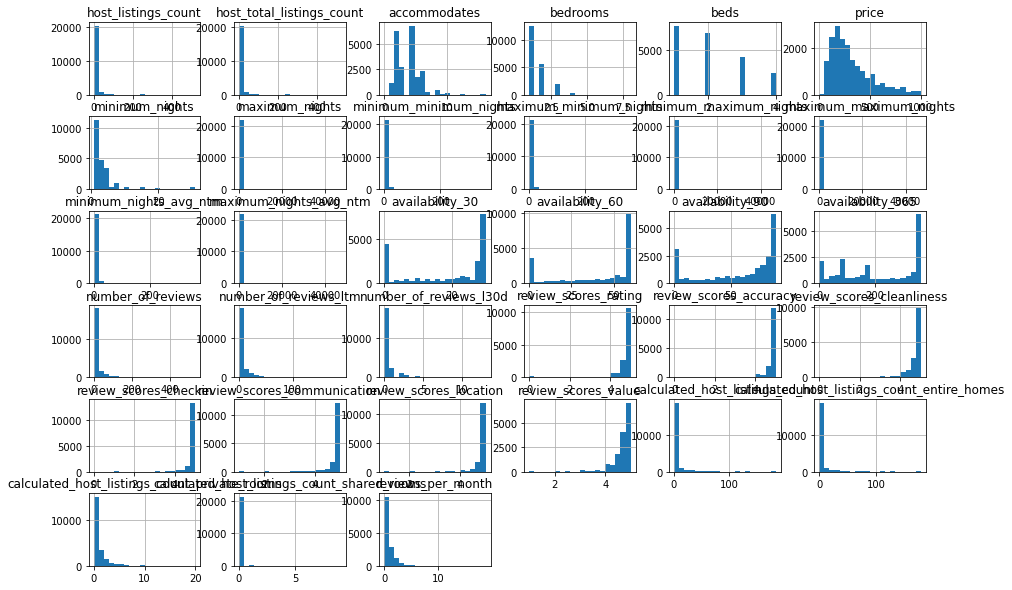

In [315]:
df_clean.hist(bins=20, figsize=(15,10));

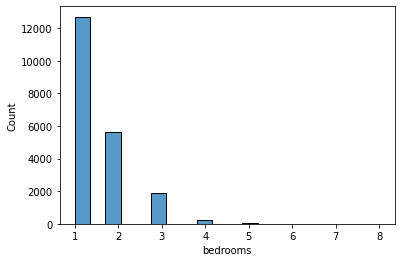

In [330]:
sns.histplot(data=df_clean.bedrooms, bins=20)

Verificando a correlação existente entre as variáveis.

In [337]:
corr = df_nums.corr()

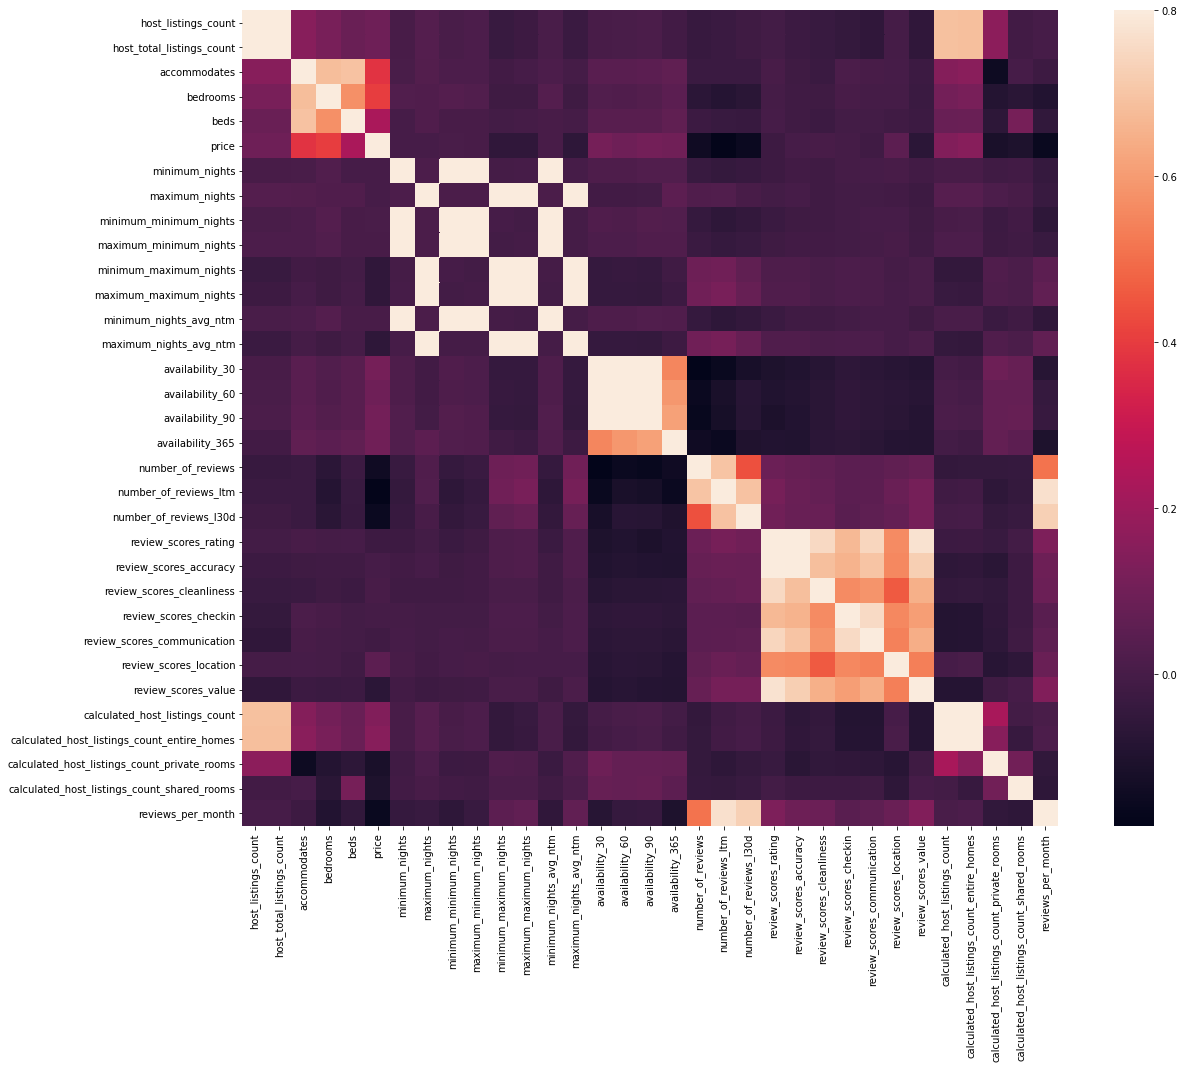

In [338]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df_nums.corr(), vmax=.8, square=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


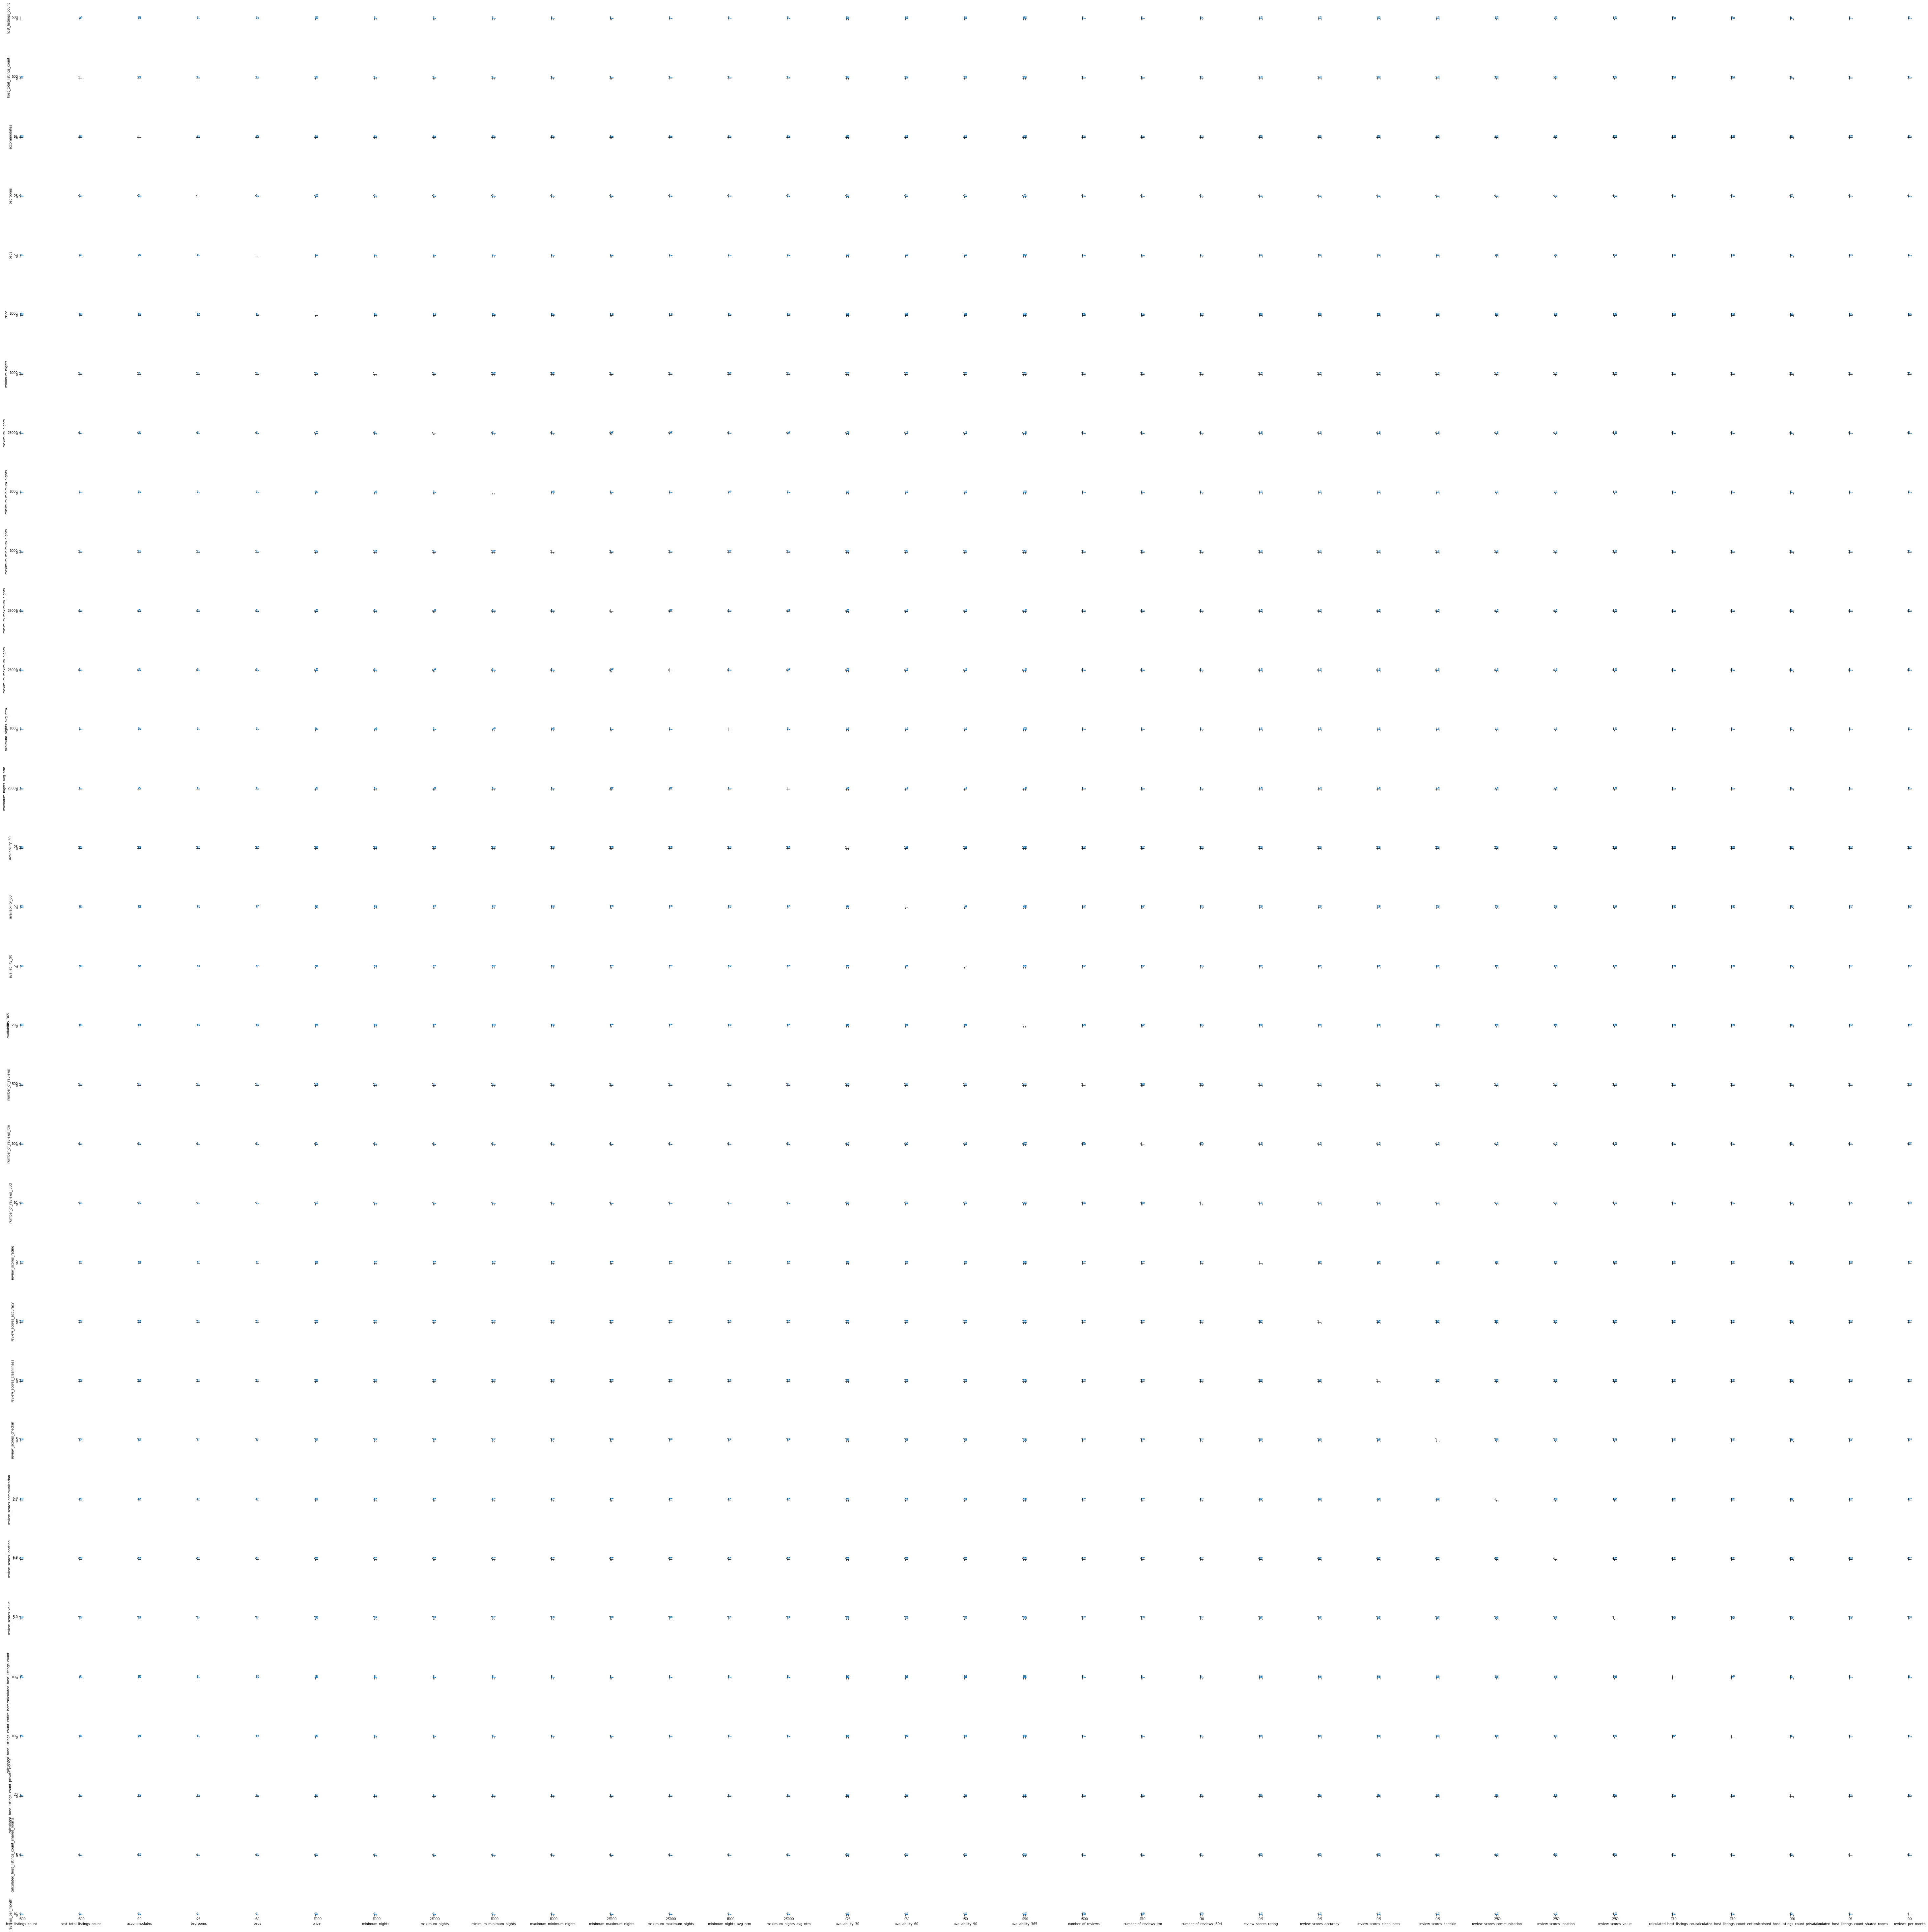

In [336]:
sns.pairplot(df_nums, size = 2.5)
plt.show();

Nota-se que há algumas correlações mais fortes relacionadas reviews. No entanto, há outras mais fracas que pode representar alguma relevância. 
<p> Como foi feita a análise das correlações cuja variáveis são numéricas ainda é necessário analisar as variáveis categóricas.


In [342]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_listings_count                           24764 non-null  float64
 1   host_total_listings_count                     24764 non-null  float64
 2   accommodates                                  24881 non-null  int64  
 3   bedrooms                                      23513 non-null  float64
 4   beds                                          24630 non-null  float64
 5   price                                         21363 non-null  float64
 6   minimum_nights                                24881 non-null  int64  
 7   maximum_nights                                24881 non-null  int64  
 8   minimum_minimum_nights                        24881 non-null  int64  
 9   maximum_minimum_nights                        24881 non-null 

A ideia portanto é identificar a influência do preço nas outras variáveis. 

In [360]:
(df_nums.beds.value_counts()/df_nums.price.count()*100).sort_values(ascending = False)

1.00    36.95
2.00    33.11
3.00    20.43
4.00    11.60
5.00     5.70
6.00     3.37
7.00     1.20
8.00     1.05
10.00    0.49
9.00     0.44
12.00    0.18
11.00    0.18
16.00    0.13
13.00    0.12
14.00    0.07
15.00    0.06
17.00    0.03
30.00    0.02
20.00    0.02
23.00    0.01
18.00    0.01
38.00    0.01
27.00    0.01
35.00    0.01
25.00    0.01
24.00    0.01
43.00    0.00
26.00    0.00
44.00    0.00
41.00    0.00
45.00    0.00
91.00    0.00
31.00    0.00
32.00    0.00
50.00    0.00
22.00    0.00
21.00    0.00
33.00    0.00
29.00    0.00
52.00    0.00
Name: beds, dtype: float64

Nota-se que as propridades de maior aluguel na cidade do Rio de Janeiro são do tipo apartamento inteiro. 

In [365]:
df_nums.bedrooms.value_counts()/df_nums.price.count()*100

AttributeError: ignored

A vizinha que possui mais taxas de aluguel na plataforma é Copacabana seguida de Ipanema. 

In [368]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:60]

neighbourhood
Vargem Pequena , Rio de Janeiro, Brazil                            900.00
Guapimirim, Rio de Janeiro, Brazil                                 900.00
Rio de Janeiro-RJ, Brazil                                          843.00
Anchieta, Rio de Janeiro, Brazil                                   800.00
Rio de Janeiro , Brazil                                            800.00
Araras, Rio de Janeiro, Rio de Janeiro, Brazil                     750.00
Praia de Guaratiba , Bahia, Brazil                                 750.00
Rio de Janeiro, barra da tijuca, Brazil                            708.00
Conceiçao de Jacareí, Rio de Janeiro, Brazil                       700.00
Copacabana, Rio de janeiro, Brazil                                 650.00
Rio de janeiro , Rio de janeiro, Brazil                            627.00
Barra da Tijuca, Rj, Brazil                                        609.00
Flamengo , Rio de Janeiro, Brazil                                  600.00
CopaCabana, Rio de Janei

Os bairros que possuem uma médoa de preço mais alta são os São Cristovão, Joá e Anchieta. Nota-se que a comunidade Complexo do Alemão está com média de preço proxima a Copacabana eeuqnato a Rocinha apresenta valores maiores que Copacabana. 

In [369]:
df[df['neighbourhood']=='Rocinha'].price

Series([], Name: price, dtype: float64)

In [370]:
df[df['neighbourhood']=='Complexo do Alemão'].price

Series([], Name: price, dtype: float64)

No caso da comunidade Rocinha há alguns preços com valores superiores bem maiores que os demais, sendo portanto outliers nessa análise. Isso pode estar destorcendo o valor da média de preços e classificando de modo geral a Rocinha superior a bairros mais nobres como Copacabana. 
<p> Uma situação parecida acontece como Complexo do Alemão, em que há apenas dois imóveis disponíveis para aluguel na plataforma. Que portanto geram um valor de média que não representa a realidade.

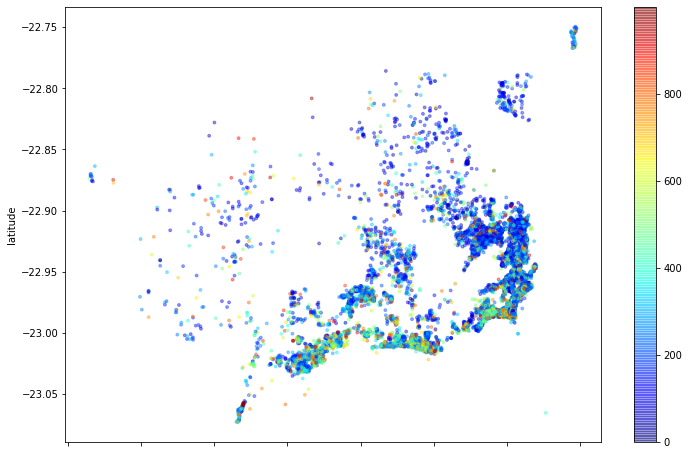

In [377]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Feita a análise superficial na base de dados do Airbnb percebeu que existem outliers em algumas das variáveis que influenciam diretamento nos resultados.
Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos. Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.